In [29]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from scipy import stats
from numpy import median
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Reading training data from the local storage
filename = 'train.csv' 
df_train = pd.read_csv(filename)

# read test data
df_test = pd.read_csv('test.csv')

# rename some columns
df_train.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

# change some int values to categorical ones
df_train['season'] = df_train.season.astype('category')
df_train['year'] = df_train.year.astype('category')
df_train['month'] = df_train.month.astype('category')
df_train['hour'] = df_train.hour.astype('category')
df_train['holiday'] = df_train.holiday.astype('category')
df_train['weekday'] = df_train.weekday.astype('category')
df_train['workingday'] = df_train.workingday.astype('category')
df_train['weather'] = df_train.weather.astype('category')

df_train = df_train.drop(['atemp', 'count', 'registered', 'windspeed'], axis=1)

In [30]:
df_train['weather'] = df_train['weather'].replace(4,3) 
df_train = pd.get_dummies(df_train)
df_train = df_train.drop(df_train[['weather_4']], axis = 1)

In [31]:
X = df_train.drop(df_train[['casual']], axis = 1)
y = df_train['casual']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
nn = MLPRegressor(hidden_layer_sizes = (128, 64,), solver = 'adam', learning_rate = 'adaptive', early_stopping = True, max_iter = 600)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

In [33]:
for i, y in enumerate(y_pred):
    if y_pred[i] < 0:
        y_pred[i] = 0

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('RMSLE:', np.sqrt(mean_squared_log_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

RMSE: 17.717823420457645
RMSLE: 0.6399423263976145
R2: 0.873845933608687


<function matplotlib.pyplot.show(*args, **kw)>

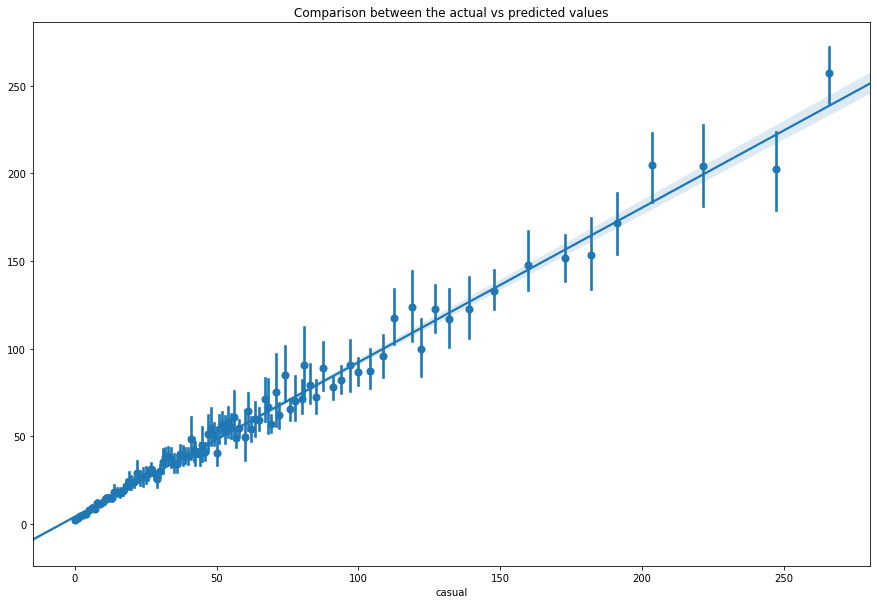

In [34]:
plt.figure(figsize=(15,10))
ax = sn.regplot(y_test, y_pred, x_bins = 200)
ax.set(title = "Comparison between the actual vs predicted values")
plt.show